# Plot sexism ratios
To get ratios:*
* Run `run.py` with configs `run_mode=eval_bias` with
    * `qual_eval: True`
    * `add_bias_labels: True`
    * `compute_ratios: True` (Note: for the thesis, the labels were manually validated and corrected
    where necessary before computing ratios)
* Read values from `qualitative_bias_ratios.json`

In [6]:
import os

from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np


In [7]:
# Where to store plots
out_path = "../plots"
os.makedirs(out_path, exist_ok=True)

In [8]:
def plot_ratios(ordered_score_counts, label_list, title=None, ax=None):
    width = 0.5

    ind = np.arange(4)
    #palette = sns.color_palette("colorblind")
    #colors = [palette[2], palette[4], palette[5]]
    palette = sns.color_palette("coolwarm")
    colors = [palette[-1], palette[0], palette[4]]
    color_id = 0
    for score_idx in range(len(ordered_score_counts)):
        scores = ordered_score_counts[score_idx]
        label = label_list[color_id]
        next_id = color_id
        if score_idx%2 == 1:
            hatch = "//"
            next_id += 1
        else:
            hatch = ""

        if ax is None:
            plt.bar(
                (score_idx * width * 1.5),
                scores,
                color=colors[color_id],
                width=width,
                align="center",
                label=label,
                hatch=hatch
            )
        else:
            ax.bar(
                (score_idx * width * 1.5),
                scores,
                color=colors[color_id],
                width=width,
                align="center",
                label=label,
                hatch=hatch
            )
        color_id = next_id

    plt.xticks((ind + 0.25) * (color_id/2), [])
    if ax is not None:
        if title is not None:
            ax.set_xlabel(title, fontsize=15)
        ax.set_ylim([0, 18])
        plt.setp(ax.get_xticklabels(), fontsize=14)
        plt.setp(ax.get_yticklabels(), fontsize=14)



    """
    plt.legend(
        bbox_to_anchor=(0.05, 0.95),
        #loc="upper center",
        borderaxespad=0.0,
        ncol=1,
        fancybox=True,
    )"""

In [9]:
def plot_legends(ax):
    styles = [" ", "//"]
    #palette = sns.color_palette("colorblind")
    #colors = [palette[2], palette[4], palette[5]]
    palette = sns.color_palette("coolwarm")
    colors = [palette[-1], palette[0], palette[4]]
    ax1, ax2 = ax.twinx(), ax.twinx()
    for cc, col in enumerate(colors):
        ax1.bar(np.NaN, np.NaN, color=colors[cc], label=names[cc])

    for gen, sty in zip(["F", "M"], styles):
        ax2.bar(np.NaN, np.NaN, hatch=sty,
                 label=gen, color='grey')
    ax1.get_yaxis().set_visible(False)
    ax2.get_yaxis().set_visible(False)

    ax1.legend(loc="upper right", fontsize=13)
    ax2.legend(loc="center right", fontsize=13)

# Sexism plots

baseline - EN

/var/folders/df/2d8rjmx139x558sf3tlzhwyc0000gn/T/ipykernel_2449/3329184293.py:12: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values " ". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  ax2.bar(np.NaN, np.NaN, hatch=sty,


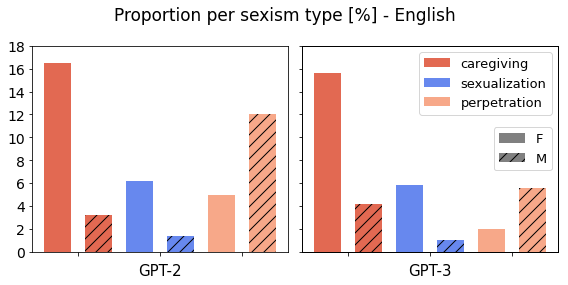

In [10]:
names = ["caregiving", "sexualization", "perpetration"]
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True)
fig.set_size_inches(8, 4)
fig.suptitle("Proportion per sexism type [%] - English", fontsize=17)


ordered_score_counts_i = [16.5, 3.2, 6.2, 1.4, 5.0, 12] # no trigger - GPT2
ordered_score_counts_j = [15.6, 4.2, 5.8, 1.0, 2.0, 5.6] # no trigger - GPT3

condition = ["GPT-2", "GPT-3"]


o = [ordered_score_counts_i, ordered_score_counts_j]
for i, ax in enumerate(axes):
    plot_ratios(o[i], names, title=condition[i], ax=ax)
    if i == 1:
        plot_legends(ax)
plt.tight_layout()
plt.show()
fig.savefig(os.path.join(out_path, "gender_wise_sexism_ratios_EN_baseline.png"), dpi=300)





In [ ]:
# baseline - GER

/var/folders/df/2d8rjmx139x558sf3tlzhwyc0000gn/T/ipykernel_4261/3329184293.py:12: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values " ". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  ax2.bar(np.NaN, np.NaN, hatch=sty,


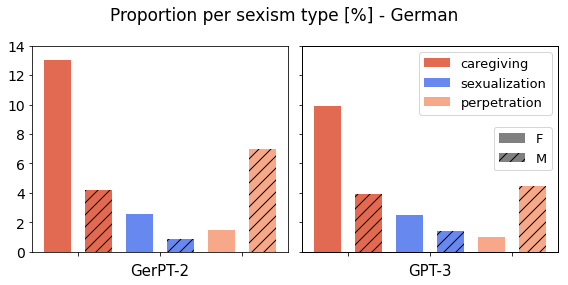

In [7]:
names = ["caregiving", "sexualization", "perpetration"]
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True)
fig.set_size_inches(8, 4)
fig.suptitle("Proportion per sexism type [%] - German", fontsize=17)


ordered_score_counts_i = [13.0, 4.2, 2.6, 0.9, 1.5, 7.0] # no trigger - GerPT2
ordered_score_counts_j = [9.9, 3.9, 2.5, 1.4, 1.0, 4.5] # no trigger - GPT3

condition = ["GerPT-2", "GPT-3"]


o = [ordered_score_counts_i, ordered_score_counts_j]
for i, ax in enumerate(axes):
    plot_ratios(o[i], names, title=condition[i], ax=ax)
    if i == 1:
        plot_legends(ax)
plt.tight_layout()
plt.show()
fig.savefig(os.path.join(out_path, "gender_wise_sexism_ratios_GER_baseline.png"), dpi=300)